In [28]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [29]:
def get_direct_errors(x: pd.Series, inst_err):
    mean = x.mean()
    sem = x.sem()
    random_err = scipy.stats.t.ppf((1 + 0.95) / 2, len(x) - 1) * sem
    abs_err = (random_err ** 2 + (2 / 3 * inst_err) ** 2) ** 0.5
    rel_err =  abs_err / mean * 100
    return abs_err, rel_err

In [30]:
def get_indirect_errors(z, x1, x2, inst_err, f):
    a1, r1 = get_direct_errors(x1, inst_err)
    a2, r2 = get_direct_errors(x2, inst_err)
    abs_z = f((x1.mean(), a1, x2.mean(), a2)) ** 0.5
    rel_z = abs_z / (sum(z) / len(z))  * 100
    return abs_z, rel_z

## Задача 1

In [31]:
t1 = pd.read_csv("t1.csv")
x_inst_err = 0.005
t_inst_err = 0.1

N = 5

t1

,x_1,x_2,t_1,t_2,h
0,0.15,0.4,1.5,3.0,0.25
1,0.15,0.5,1.6,3.3,0.35
2,0.15,0.7,1.7,4.5,0.55
3,0.15,0.9,1.7,4.8,0.75
4,0.15,1.1,1.6,5.2,0.95


In [32]:
t1["Y"] = t1["x_2"] - t1["x_1"]
t1["Z"] = (t1["t_2"] ** 2 - t1["t_1"] ** 2) / 2

In [33]:
# Отклонения Y
t1["Y_abs_err"] = (((2 / 3) * x_inst_err) ** 2 * 2) ** 0.5
t1["Y_abs_err"] = np.round(t1["Y_abs_err"], 3)
t1["Y_rel_err"] = round(t1["Y_abs_err"] / t1["Y"] * 100, 1)

In [34]:
t1

,x_1,x_2,t_1,t_2,h,Y,Z,Y_abs_err,Y_rel_err
0,0.15,0.4,1.5,3.0,0.25,0.25,3.375,0.005,2.0
1,0.15,0.5,1.6,3.3,0.35,0.35,4.165,0.005,1.4
2,0.15,0.7,1.7,4.5,0.55,0.55,8.680,0.005,0.9
3,0.15,0.9,1.7,4.8,0.75,0.75,10.075,0.005,0.7
4,0.15,1.1,1.6,5.2,0.95,0.95,12.240,0.005,0.5


In [35]:
# Отклонения Z
t1["Z_abs_err"] = ((2 * t1["t_1"] * 2 / 3 * t_inst_err) ** 2 + (2 * t1["t_2"] * 2 / 3 * t_inst_err) ** 2) ** 0.5
t1["Z_abs_err"] = np.round(t1["Z_abs_err"], 1)
t1["Z_rel_err"] = round(t1["Z_abs_err"] / t1["Z"] * 100)

In [36]:
t1["Z_rel_err"] = t1["Z_rel_err"].astype(int)
t1["Z"] = round(t1["Z"], 1)

In [37]:
t1

,x_1,x_2,t_1,t_2,h,Y,Z,Y_abs_err,Y_rel_err,Z_abs_err,Z_rel_err
0,0.15,0.4,1.5,3.0,0.25,0.25,3.4,0.005,2.0,0.4,12
1,0.15,0.5,1.6,3.3,0.35,0.35,4.2,0.005,1.4,0.5,12
2,0.15,0.7,1.7,4.5,0.55,0.55,8.7,0.005,0.9,0.6,7
3,0.15,0.9,1.7,4.8,0.75,0.75,10.1,0.005,0.7,0.7,7
4,0.15,1.1,1.6,5.2,0.95,0.95,12.2,0.005,0.5,0.7,6


In [38]:
a = sum(t1["Z"] * t1["Y"]) / sum(t1["Z"] ** 2)

sigma_a = (sum((t1["Y"] - a * t1["Z"]) ** 2) / (N - 1) / sum(t1["Z"] ** 2)) ** 0.5

alpha = 0.90
a_abs_err = 2 * sigma_a

a_rel_err = a_abs_err / a * 100

In [39]:
a_rel_err

8.047610874185745

In [40]:
t1

,x_1,x_2,t_1,t_2,h,Y,Z,Y_abs_err,Y_rel_err,Z_abs_err,Z_rel_err
0,0.15,0.4,1.5,3.0,0.25,0.25,3.4,0.005,2.0,0.4,12
1,0.15,0.5,1.6,3.3,0.35,0.35,4.2,0.005,1.4,0.5,12
2,0.15,0.7,1.7,4.5,0.55,0.55,8.7,0.005,0.9,0.6,7
3,0.15,0.9,1.7,4.8,0.75,0.75,10.1,0.005,0.7,0.7,7
4,0.15,1.1,1.6,5.2,0.95,0.95,12.2,0.005,0.5,0.7,6


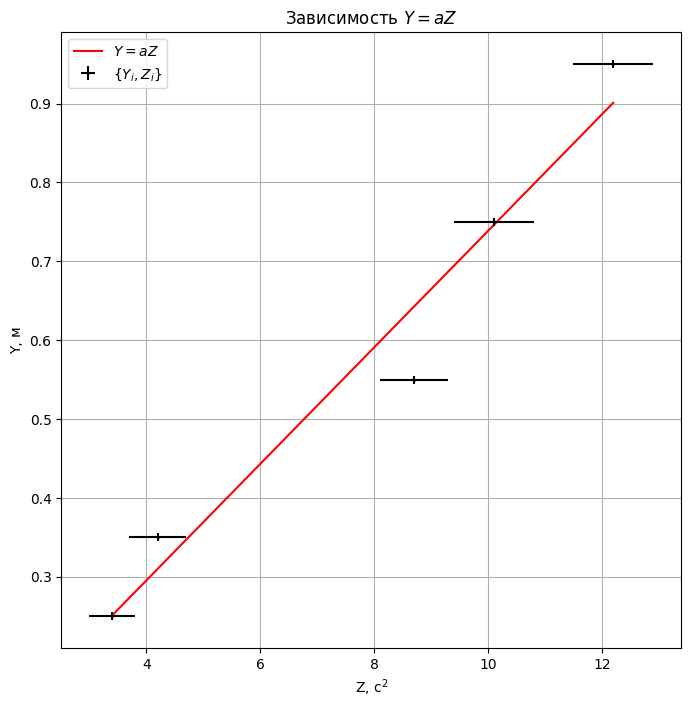

In [41]:
plt.figure(figsize=(8, 8))
plt.plot(t1["Z"], a * t1["Z"], color="red", label=r"$Y=aZ$")
plt.errorbar(t1["Z"], t1["Y"], xerr=t1["Z_abs_err"], yerr=t1["Y_abs_err"], linestyle="none", marker='o', markersize=1, color="black",
             label=r"$\{Y_{i},Z_{i}\}$")
plt.title(r"Зависимость $Y=aZ$")
plt.xlabel(r"Z, c$^2$")
plt.ylabel("Y, м")
plt.grid()
plt.legend()

## Задача 2

In [42]:
t2 = pd.read_csv("t2.csv")
h_inst_err = 0.0005
x_inst_err = 0.005
t_inst_err = 0.1
x1 = 0.15 
x2 = 1.10
x = 0.22
x_stroke = 1.0
h0 = 0.193
h0_stroke = 0.195
N = 5

In [43]:
t2 = t2.fillna(method="ffill")
t2[["h", "h'"]] /= 1000
t3 = t2.groupby(["N", "h", "h'"])[["t_1", "t_2"]].mean().reset_index()
t3["sin_alpha"] = abs(((h0 - t3["h"]) - (h0_stroke - t3["h'"])) / (x_stroke - x))
t3

,N,h,h',t_1,t_2,sin_alpha
0,1,0.2020,0.196,1.98,5.96,0.010256
1,2,0.2120,0.196,1.36,3.80,0.023077
2,3,0.2210,0.197,1.04,2.94,0.033333
3,4,0.2295,0.197,1.08,2.72,0.044231
4,5,0.2390,0.197,1.28,2.76,0.056410


In [44]:
t3["sin_alpha"] = abs(((h0 - t3["h"]) - (h0_stroke - t3["h'"])) / (x_stroke - x))
t3

,N,h,h',t_1,t_2,sin_alpha
0,1,0.2020,0.196,1.98,5.96,0.010256
1,2,0.2120,0.196,1.36,3.80,0.023077
2,3,0.2210,0.197,1.04,2.94,0.033333
3,4,0.2295,0.197,1.08,2.72,0.044231
4,5,0.2390,0.197,1.28,2.76,0.056410


In [45]:
t1_abs_errors = []
t1_rel_errors = []
t2_abs_errors = []
t2_rel_errors = []
for e in range(1, N + 1):
    cur_t = t2[t2["N"] == e]
    abs_err, rel_err = get_direct_errors(cur_t["t_1"], t_inst_err)
    t1_abs_errors.append(abs_err)
    t1_rel_errors.append(rel_err)
    abs_err, rel_err = get_direct_errors(cur_t["t_2"], t_inst_err)
    t2_abs_errors.append(abs_err)
    t2_rel_errors.append(rel_err)


t3["t1_abs_err"] = t1_abs_errors
t3["t1_rel_err"] = t1_rel_errors
t3["t2_abs_err"] = t2_abs_errors
t3["t2_rel_err"] = t2_rel_errors

t3

,N,h,h',t_1,t_2,sin_alpha,t1_abs_err,t1_rel_err,t2_abs_err,t2_rel_err
0,1,0.2020,0.196,1.98,5.96,0.010256,0.214642,10.840499,0.342039,5.738910
1,2,0.2120,0.196,1.36,3.80,0.023077,0.675404,49.662093,0.727071,19.133452
2,3,0.2210,0.197,1.04,2.94,0.033333,0.265968,25.573816,0.265968,9.046520
3,4,0.2295,0.197,1.08,2.72,0.044231,0.614445,56.893080,0.588819,21.647775
4,5,0.2390,0.197,1.28,2.76,0.056410,0.929079,72.584296,0.950407,34.435022


In [46]:
t3["a"] = 2 * (x2 - x1) / (t3["t_2"] ** 2 - t3["t_1"] ** 2)
t3["a_delta"] = t3["a"] * (2 * x_inst_err ** 2 / (x2 - x1) ** 2 +
            4 * ((t3["t_1"] * t3["t1_abs_err"]) ** 2 + (t3["t_2"] * t3["t2_abs_err"]) ** 2) / (t3["t_2"] ** 2 - t3["t_1"] ** 2)) ** 0.5
t3

,N,h,h',t_1,t_2,sin_alpha,t1_abs_err,t1_rel_err,t2_abs_err,t2_rel_err,a,a_delta
0,1,0.2020,0.196,1.98,5.96,0.010256,0.214642,10.840499,0.342039,5.738910,0.060124,0.044546
1,2,0.2120,0.196,1.36,3.80,0.023077,0.675404,49.662093,0.727071,19.133452,0.150909,0.247659
2,3,0.2210,0.197,1.04,2.94,0.033333,0.265968,25.573816,0.265968,9.046520,0.251256,0.151579
3,4,0.2295,0.197,1.08,2.72,0.044231,0.614445,56.893080,0.588819,21.647775,0.304878,0.423451
4,5,0.2390,0.197,1.28,2.76,0.056410,0.929079,72.584296,0.950407,34.435022,0.317768,0.748565


In [47]:
t3["sin_alpha"] = round(t3["sin_alpha"], 2)
t3["t1_abs_err"] = round(t3["t1_abs_err"], 1)
t3["t2_abs_err"] = round(t3["t2_abs_err"], 1)
t3["a"] = round(t3["a"], 2)
t3["a_delta"] = round(t3["a_delta"], 2)


In [48]:
t3.drop(columns=["t1_rel_err", "t2_rel_err"])

,N,h,h',t_1,t_2,sin_alpha,t1_abs_err,t2_abs_err,a,a_delta
0,1,0.2020,0.196,1.98,5.96,0.01,0.2,0.3,0.06,0.04
1,2,0.2120,0.196,1.36,3.80,0.02,0.7,0.7,0.15,0.25
2,3,0.2210,0.197,1.04,2.94,0.03,0.3,0.3,0.25,0.15
3,4,0.2295,0.197,1.08,2.72,0.04,0.6,0.6,0.30,0.42
4,5,0.2390,0.197,1.28,2.76,0.06,0.9,1.0,0.32,0.75


In [49]:
B = g = (sum(t3["a"] * t3["sin_alpha"]) - 1 / N * sum(t3["a"]) * sum(t3["sin_alpha"])) / \
            (sum(t3["sin_alpha"] ** 2) - 1 / N * (sum(t3["sin_alpha"])) ** 2)
g

5.2297297297297245

In [50]:
A = 1 / N * (sum(t3["a"]) - B * sum(t3["sin_alpha"]))
A

0.04864864864864882

In [51]:
t3["d"] = t3["a"] - (A + B * t3["sin_alpha"])
D = sum(t3["sin_alpha"] ** 2) - 1 / N * sum(t3["sin_alpha"]) ** 2
sigma_g = (sum(t3["d"] ** 2) / D / (N - 2)) ** 0.5
delta_g = 2 * sigma_g
sigma_g, delta_g

(1.2771283147781525, 2.554256629556305)

In [52]:
t3

,N,h,h',t_1,t_2,sin_alpha,t1_abs_err,t1_rel_err,t2_abs_err,t2_rel_err,a,a_delta,d
0,1,0.2020,0.196,1.98,5.96,0.01,0.2,10.840499,0.3,5.738910,0.06,0.04,-0.040946
1,2,0.2120,0.196,1.36,3.80,0.02,0.7,49.662093,0.7,19.133452,0.15,0.25,-0.003243
2,3,0.2210,0.197,1.04,2.94,0.03,0.3,25.573816,0.3,9.046520,0.25,0.15,0.044459
3,4,0.2295,0.197,1.08,2.72,0.04,0.6,56.893080,0.6,21.647775,0.30,0.42,0.042162
4,5,0.2390,0.197,1.28,2.76,0.06,0.9,72.584296,1.0,34.435022,0.32,0.75,-0.042432


In [53]:
5.88-9.8195

-3.9395

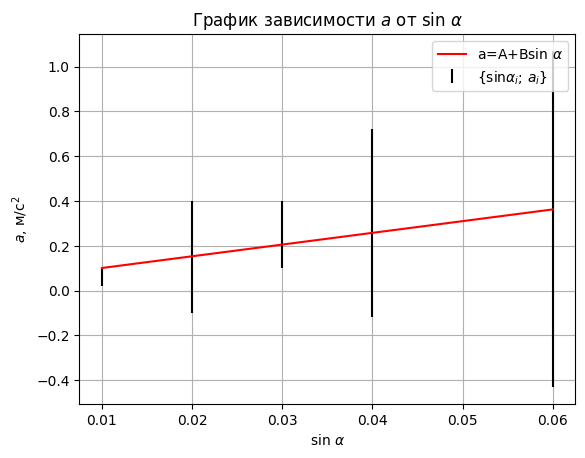

In [54]:
plt.grid()
plt.errorbar(t3["sin_alpha"], t3["a"], color="black", yerr=t3["a_delta"], linestyle="none", label=r"{sin$\alpha_{i}$; $a_{i}$}")
plt.plot(t3["sin_alpha"], A + B * t3["sin_alpha"], color="red", label=r"a=A+Bsin $\alpha$")
plt.title(r"График зависимости $a$ от sin $\alpha$")
plt.xlabel(r"sin $\alpha$")
plt.ylabel(r"$a$, м/с$^2$")
plt.legend()
plt.show()